<a href="https://colab.research.google.com/github/Krishil-007/Hate-Speech-Recognition/blob/main/Models_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing 

In [ ]:
# importing Modules
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import plot_tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import re

In [ ]:
# Data Cleaning (Removing Links From the Dataset)
df = pd.read_csv("labeled_data.csv")
df['tweet'] = df['tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df['tweet'] = df['tweet'].str.replace('http[s]', ' ')
df.to_csv("/content/data.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Printing Dataset
df = df[0:len(df)-1]
print(df)
"""0 - hate speech 
   1 - offensive language
   2 - neither"""

       Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24777       25290      3            2                   1        0      0   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   

                                                   tweet  
0      !!! RT @m

'0 - hate speech \n   1 - offensive language\n   2 - neither'

In [ ]:
# Creating train and test dataset
X_primary = df['tweet']
Y = df['class']
cv = TfidfVectorizer()
X = cv.fit_transform(X_primary)
print(X)

  (0, 21513)	0.15319130534265502
  (0, 29675)	0.15042897628425742
  (0, 28613)	0.09005525560793928
  (0, 28081)	0.20003884715825376
  (0, 2324)	0.20106893211728638
  (0, 25961)	0.20762875310314213
  (0, 18401)	0.17834363660643518
  (0, 2432)	0.16199554295026192
  (0, 13785)	0.2299226084176294
  (0, 32631)	0.1421949025706353
  (0, 30515)	0.14042708336034013
  (0, 6655)	0.33656084641057105
  (0, 1697)	0.1595570604914254
  (0, 7031)	0.28440399860940097
  (0, 25966)	0.2856916523764908
  (0, 32581)	0.18920907679507584
  (0, 31978)	0.23861586161888915
  (0, 2870)	0.35258627711780643
  (0, 18748)	0.3825301905198702
  (0, 24707)	0.08225585264530276
  (1, 22394)	0.2622294487842765
  (1, 629)	0.2849530968826338
  (1, 14437)	0.12080628428815068
  (1, 13519)	0.1372765735445475
  (1, 8114)	0.2096974574304683
  :	:
  (24779, 12292)	0.2794255053072462
  (24779, 5104)	0.29006172970473215
  (24779, 18826)	0.15504892239547116
  (24779, 2479)	0.2767150611515133
  (24779, 28613)	0.11552402968990026
  (247

# Models Without GridSearch

0.7984196368527237 76.0
[[ 0.78694214 50.        ]
 [ 0.78038538 51.        ]
 [ 0.78480161 52.        ]
 [ 0.78210852 53.        ]
 [ 0.79       54.        ]
 [ 0.78111549 55.        ]
 [ 0.78817056 56.        ]
 [ 0.78493009 57.        ]
 [ 0.7828802  58.        ]
 [ 0.78860348 59.        ]
 [ 0.77998588 60.        ]
 [ 0.78996379 61.        ]
 [ 0.78806541 62.        ]
 [ 0.78789531 63.        ]
 [ 0.79208698 64.        ]
 [ 0.78741065 65.        ]
 [ 0.7857821  66.        ]
 [ 0.78726006 67.        ]
 [ 0.79031648 68.        ]
 [ 0.79304959 69.        ]
 [ 0.78829859 70.        ]
 [ 0.78948101 71.        ]
 [ 0.78599222 72.        ]
 [ 0.77988643 73.        ]
 [ 0.79438237 74.        ]
 [ 0.78615236 75.        ]
 [ 0.79841964 76.        ]
 [ 0.78789474 77.        ]
 [ 0.79497524 78.        ]
 [ 0.78847262 79.        ]
 [ 0.79564253 80.        ]
 [ 0.79740922 81.        ]
 [ 0.78816409 82.        ]
 [ 0.79634465 83.        ]
 [ 0.7899647  84.        ]
 [ 0.78214094 85.        ]
 [ 0

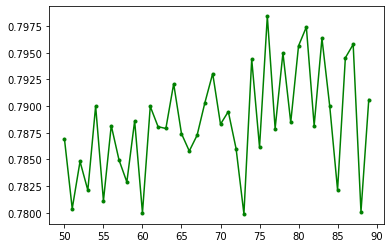

In [ ]:
#APPLYING MULTINOMIALNB
acc = []
for i in range(50,90):
  arr = []
  train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=i/100)
  M_nb = MultinomialNB()
  M_nb.fit(train_X,train_Y)
  pred_y = M_nb.predict(test_X)
  accuracy = metrics.accuracy_score(pred_y,test_Y)
  arr.append(accuracy)
  arr.append(i)
  acc.append(arr)
acc = np.array(acc)
plt.plot(acc[:,1],acc[:,0],marker='.',color='g')
max_acc = acc[0,0]
max_index = acc[0,1]
for i in acc:
  if i[0]>max_acc:
    max_acc = i[0]
    max_index = i[1]

print(max_acc, max_index)
print(acc)
print("For different ratio of train and test data we have got maximum accuracy of {0} for {1}% of training Data and {2}% of Test data".format(max_acc,max_index/100,(100-max_index)/100))

In [ ]:
# SVM
X = df['tweet']
Y = df['class']
cv = TfidfVectorizer(lowercase=True)
X = cv.fit_transform(X)
size = X.shape[0]
acc = []
for i in range(50,95,5):
  arr = []
  train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=i/100)
  SVM = SVC(kernel = 'linear', probability=True)
  SVM.fit(train_X,train_Y)
  pred_y = SVM.predict(test_X)
  arr.append(metrics.accuracy_score(pred_y,test_Y))
  arr.append(i)
  acc.append(arr)
  print(acc)
print(acc)
plt.title("Support Vector Machine")
plt.xlabel("training dataset size (in %)")
plt.ylabel("Accuracy")
plt.plot(acc[:,1],acc[:,0],marker='.',color='g')
max_acc = acc[0,0]
max_index = acc[0,1]
for i in acc:
  if i[0]>max_acc:
    max_acc = i[0]
    max_index = i[1]
print("For different ratio of train and test data we have got maximum accuracy of {0} for {1}% of training Data and {2}% of Test data".format(max_acc,max_index/100,(100-max_index)/100))

We got maximum accuracy of 0.8301391970950172 for K=7.0


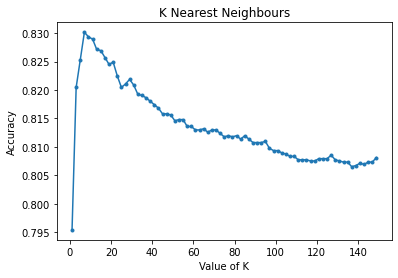

In [ ]:
# KNN
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.20)
acc=[]
for i in range(1,150,2):
  arr = []
  clf=KNeighborsClassifier(n_neighbors=i)
  clf.fit(train_X,train_Y)
  y_pred=clf.predict(test_X)
  arr.append(metrics.accuracy_score(test_Y,y_pred,normalize=True))
  arr.append(i)
  acc.append(arr)
acc = np.array(acc)
plt.title("K Nearest Neighbours")
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.plot(acc[:,1],acc[:,0],marker='.')
max_acc = acc[0,0]
max_index = acc[0,1]
for i in acc:
  if i[0]>max_acc:
    max_acc = i[0]
    max_index = i[1]
print("We got maximum accuracy of {0} for K={1}".format(max_acc,max_index))

[[0.8836252118473086, 50]]
[[0.8836252118473086, 50], [0.8855810616929699, 55]]
[[0.8836252118473086, 50], [0.8855810616929699, 55], [0.8822757994552608, 60]]
[[0.8836252118473086, 50], [0.8855810616929699, 55], [0.8822757994552608, 60], [0.89428176158635, 65]]
[[0.8836252118473086, 50], [0.8855810616929699, 55], [0.8822757994552608, 60], [0.89428176158635, 65], [0.8894418291862811, 70]]
[[0.8836252118473086, 50], [0.8855810616929699, 55], [0.8822757994552608, 60], [0.89428176158635, 65], [0.8894418291862811, 70], [0.881536475145255, 75]]
[[0.8836252118473086, 50], [0.8855810616929699, 55], [0.8822757994552608, 60], [0.89428176158635, 65], [0.8894418291862811, 70], [0.881536475145255, 75], [0.8930804922332055, 80]]
[[0.8836252118473086, 50], [0.8855810616929699, 55], [0.8822757994552608, 60], [0.89428176158635, 65], [0.8894418291862811, 70], [0.881536475145255, 75], [0.8930804922332055, 80], [0.8878429263044648, 85]]
[[0.8836252118473086, 50], [0.8855810616929699, 55], [0.8822757994552

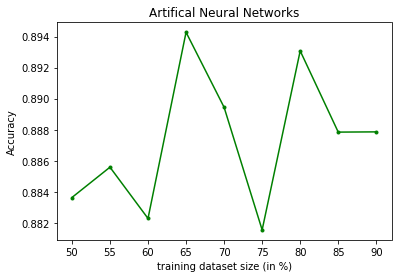

In [ ]:
# ANN 
X = df['tweet']
Y = df['class']
cv = TfidfVectorizer(lowercase=True)
X = cv.fit_transform(X)
size = X.shape[0]
acc = []
test_sequence=[]
for i in range(50,95,5):
  arr = []
  test_sequence.append(i)
  train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=i/100)
  MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(6,),random_state=1, activation='relu', max_iter=500)
  MLP.fit(train_X,train_Y)
  pred_y = MLP.predict(test_X)
  arr.append(metrics.accuracy_score(pred_y,test_Y))
  arr.append(i)
  acc.append(arr)
  print(acc)
acc = np.array(acc)
plt.title("Artifical Neural Networks")
plt.xlabel("training dataset size (in %)")
plt.ylabel("Accuracy")
plt.plot(acc[:,1],acc[:,0],marker='.',color='g')
print(acc)
max_acc = acc[0,0]
max_index = acc[0,1]
for i in acc:
  if i[0]>max_acc:
    max_acc = i[0]
    max_index = i[1]
print("For different ratio of train and test data we have got maximum accuracy of {0} for {1}% of training Data and {2}% of Test data".format(max_acc,max_index,100-max_index))

In [ ]:
# DT
def train_using_gini(X_train, X_test, Y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=3, min_samples_leaf=5)
    # Performing training
    clf_gini.fit(X_train, Y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(test_X)
    print("Predicted values:")
    print(y_pred)
    return y_pred
def cal_accuracy(y_test, y_pred):
    """print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
    print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
    print("Report : ",classification_report(y_test, y_pred))"""
    return accuracy_score(y_test,y_pred)*100

acc1 = []
acc2 = []
for i in range(50,95,5):
  arr1 = []
  train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=i/100)
  clf_gini = train_using_gini(train_X, test_X, train_Y)
  clf_entropy = tarin_using_entropy(train_X, test_X, train_Y)
  # Operational Phase
  # Prediction using gini
  y_pred_gini = prediction(test_X, clf_gini)
  arr1.append(cal_accuracy(test_Y, y_pred_gini))
  arr1.append(i)
  # Prediction using entropy
  y_pred_entropy = prediction(test_X, clf_entropy)
  arr2 = []
  arr2.append(cal_accuracy(test_Y, y_pred_entropy))
  arr2.append(i)
  acc1.append(arr1)
  acc2.append(arr2)

print(acc1,acc2)
acc1 = np.array(acc1)
acc2 = np.array(acc2)
max_acc_g = acc1[0,0]
max_index_g = acc1[0,1]
for i in acc1:
  if i[0]>max_acc_g:
    max_acc_g = i[0]
    max_index_g = i[1]
max_acc_e = acc2[0,0]
max_index_e = acc2[0,1]
for i in acc2:
  if i[0]>max_acc_e:
    max_acc_e = i[0]
    max_index_e = i[1]
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=max_index_g/100)
gini_clf = train_using_gini(train_X, test_X, train_Y)
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=max_index_e/100)
entropy_clf = tarin_using_entropy(train_X, test_X, train_Y)
print("Accuracy (Gini Index): ",max_acc_g)
print("Accuracy (Entropy): ",max_acc_e)

Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
Predicted values:
[1 1 1 ... 1 1 1]
[[77.74190945040755, 50], [77.60939741750359, 55], [77.78674467870474, 60], [77.81876873414802, 65], [77.47141896435777, 70], [77.01743060038734, 75], [77.8696792414767, 80], [77.72996234534696, 85], [77.97498991528842, 90]] [[77.70155758211605, 50], [77.60939741750359, 55], [77.78674467870474, 60], [77.8072400276689, 65], [77.44451916610625, 70], [7

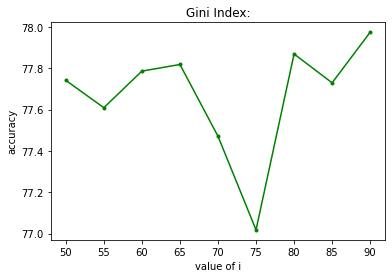

In [ ]:
plt.title("Gini Index:")
plt.xlabel("value of i")
plt.ylabel("accuracy")
plt.plot(acc1[:,1],acc1[:,0],marker='.',color='g')

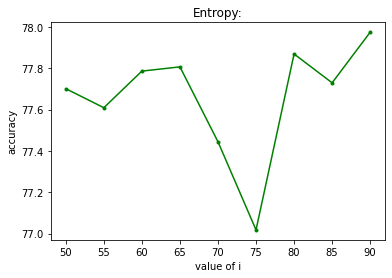

In [ ]:
plt.title("Entropy:")
plt.xlabel("value of i")
plt.ylabel("accuracy")
plt.plot(acc2[:,1],acc2[:,0],marker='.',color='g')

[Text(0.5, 0.875, 'X[4275] <= 0.002\ngini = 0.369\nsamples = 22303\nvalue = [1271, 17266, 3766]'),
 Text(0.25, 0.625, 'X[4282] <= 0.003\ngini = 0.471\nsamples = 15220\nvalue = [1115, 10350, 3755]'),
 Text(0.125, 0.375, 'X[13527] <= 0.004\ngini = 0.522\nsamples = 12677\nvalue = [1072, 7850, 3755]'),
 Text(0.0625, 0.125, 'gini = 0.56\nsamples = 10794\nvalue = [1033, 6020, 3741]'),
 Text(0.1875, 0.125, 'gini = 0.055\nsamples = 1883\nvalue = [39, 1830, 14]'),
 Text(0.375, 0.375, 'X[20569] <= 0.199\ngini = 0.033\nsamples = 2543\nvalue = [43, 2500, 0]'),
 Text(0.3125, 0.125, 'gini = 0.024\nsamples = 2435\nvalue = [30, 2405, 0]'),
 Text(0.4375, 0.125, 'gini = 0.212\nsamples = 108\nvalue = [13, 95, 0]'),
 Text(0.75, 0.625, 'X[20559] <= 0.133\ngini = 0.046\nsamples = 7083\nvalue = [156, 6916, 11]'),
 Text(0.625, 0.375, 'X[8694] <= 0.253\ngini = 0.036\nsamples = 6641\nvalue = [112, 6518, 11]'),
 Text(0.5625, 0.125, 'gini = 0.035\nsamples = 6623\nvalue = [107, 6505, 11]'),
 Text(0.6875, 0.125, 'g

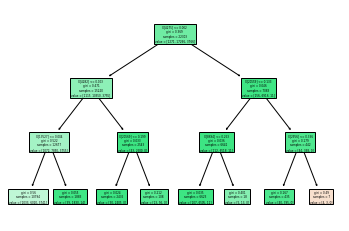

In [ ]:
plot_tree(gini_clf,filled = True)

[Text(0.5, 0.875, 'X[4275] <= 0.002\nentropy = 0.955\nsamples = 22303\nvalue = [1294, 17284, 3725]'),
 Text(0.25, 0.625, 'X[4282] <= 0.003\nentropy = 1.153\nsamples = 15173\nvalue = [1124, 10334, 3715]'),
 Text(0.125, 0.375, 'X[13527] <= 0.004\nentropy = 1.25\nsamples = 12623\nvalue = [1077, 7831, 3715]'),
 Text(0.0625, 0.125, 'entropy = 1.324\nsamples = 10759\nvalue = [1038, 6021, 3700]'),
 Text(0.1875, 0.125, 'entropy = 0.214\nsamples = 1864\nvalue = [39, 1810, 15]'),
 Text(0.375, 0.375, 'X[9610] <= 0.114\nentropy = 0.133\nsamples = 2550\nvalue = [47, 2503, 0]'),
 Text(0.3125, 0.125, 'entropy = 0.121\nsamples = 2544\nvalue = [42, 2502, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.75, 0.625, 'X[20559] <= 0.027\nentropy = 0.178\nsamples = 7130\nvalue = [170, 6950, 10]'),
 Text(0.625, 0.375, 'X[10475] <= 0.106\nentropy = 0.149\nsamples = 6638\nvalue = [123, 6505, 10]'),
 Text(0.5625, 0.125, 'entropy = 0.146\nsamples = 6633\nvalue = [119, 6504, 10

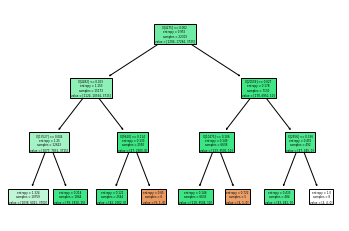

In [ ]:
plot_tree(entropy_clf,filled=True)

# Models with GridSearch

In [ ]:
#multinomialNB with GridSearch
acc = []
alpha = [1,0.5,0.1,0.01,0.001,0.0001]
param = {'alpha': alpha}
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=max_index/100)
M_nb = GridSearchCV(MultinomialNB(),param,refit=True,verbose=3)
M_nb.fit(train_X,train_Y)
pred_y = M_nb.predict(test_X)
print(M_nb.best_params_)
print("Accuracy Score: ",metrics.accuracy_score(pred_y,test_Y))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...........................alpha=1;, score=0.789 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.788 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.789 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.790 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.787 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.812 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;, score=0.809 total time=   0.0s
[CV 3/5] END .........................alpha=0.5;, score=0.812 total time=   0.0s
[CV 4/5] END .........................alpha=0.5;, score=0.808 total time=   0.0s
[CV 5/5] END .........................alpha=0.5;, score=0.808 total time=   0.0s
[CV 1/5] END .........................alpha=0.1;, score=0.845 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;,

In [ ]:
# SVM with GridSearch
X = df['tweet']
Y = df['class']
cv = TfidfVectorizer(lowercase=True)
X = cv.fit_transform(X)
size = X.shape[0]
params = {'C': [0.1,1,10,100,1000],
         'gamma': [1,0.1,0.01,0.001,0.0001],
         'kernel': ['rbf','linear','poly'],
          }
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=max_index/100)
search = GridSearchCV(SVC(),params,refit=True,verbose=3)
search.fit(train_X,train_Y)
pred_y = search.predict(test_X)
print("Accuracy: ",metrics.accuracy_score(pred_y,test_Y))
print("The Best Parameters being: ",search.best_params_)

In [ ]:
# KNN with GridSearch
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,test_size=0.15)
sc=StandardScaler()
lst= range(1,200,2)
params3 = {'n_neighbors': lst}
grid = GridSearchCV(KNeighborsClassifier(), params3, cv=3, scoring='accuracy',verbose=3)
grid.fit(train_X,train_Y)
grid.best_params_
pred_y = grid.predict(test_X)
print(metrics.accuracy_score(pred_y,test_Y))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END .....................n_neighbors=1;, score=0.782 total time=   2.2s
[CV 2/3] END .....................n_neighbors=1;, score=0.770 total time=   2.1s
[CV 3/3] END .....................n_neighbors=1;, score=0.773 total time=   2.3s
[CV 1/3] END .....................n_neighbors=3;, score=0.806 total time=   2.6s
[CV 2/3] END .....................n_neighbors=3;, score=0.795 total time=   4.7s
[CV 3/3] END .....................n_neighbors=3;, score=0.808 total time=   2.6s
[CV 1/3] END .....................n_neighbors=5;, score=0.812 total time=   3.1s
[CV 2/3] END .....................n_neighbors=5;, score=0.808 total time=   3.0s
[CV 3/3] END .....................n_neighbors=5;, score=0.814 total time=   3.1s
[CV 1/3] END .....................n_neighbors=7;, score=0.816 total time=   3.0s
[CV 2/3] END .....................n_neighbors=7;, score=0.808 total time=   3.0s
[CV 3/3] END .....................n_neighbors=

In [ ]:
# ANN using Grid Search
X = df['tweet']
Y = df['class']
cv = TfidfVectorizer(lowercase=True)
X = cv.fit_transform(X)
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.85)
size = X.shape[0]
acc = []
test_sequence=[]
params4 = {'solver': ['lbfgs', 'sgd', 'adam'], 'hidden_layer_sizes':[(4), (5,),(6,), (7,)],'activation':['identity', 'logistic', 'tanh', 'relu']}
grid = GridSearchCV(MLPClassifier(), params4, cv=3, scoring='accuracy',verbose=3)
grid.fit(train_X,train_Y)
pred_y = grid.predict(test_X)
print(metrics.accuracy_score(pred_y,test_Y))
grid.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END activation=identity, hidden_layer_sizes=4, solver=lbfgs;, score=0.888 total time=   5.7s
[CV 2/3] END activation=identity, hidden_layer_sizes=4, solver=lbfgs;, score=0.884 total time=   5.8s
[CV 3/3] END activation=identity, hidden_layer_sizes=4, solver=lbfgs;, score=0.880 total time=   9.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=identity, hidden_layer_sizes=4, solver=sgd;, score=0.851 total time=  48.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=identity, hidden_layer_sizes=4, solver=sgd;, score=0.846 total time=  51.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=identity, hidden_layer_sizes=4, solver=sgd;, score=0.835 total time=  49.6s
[CV 1/3] END activation=identity, hidden_layer_sizes=4, solver=adam;, score=0.859 total time=  36.4s
[CV 2/3] END activation=identity, hidden_layer_sizes=4, solver=adam;, score=0.847 total time=  35.9s
[CV 3/3] END activation=identity, hidden_layer_sizes=4, solver=adam;, score=0.846 total time=  40.8s
[CV 1/3] END activation=identity, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.883 total time=   9.2s
[CV 2/3] END activation=identity, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.872 total time=   9.6s
[CV 3/3] END activation=identity, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.881 total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=identity, hidden_layer_sizes=(5,), solver=sgd;, score=0.831 total time=  56.0s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=identity, hidden_layer_sizes=(5,), solver=sgd;, score=0.841 total time=  55.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=identity, hidden_layer_sizes=(5,), solver=sgd;, score=0.780 total time=  56.1s
[CV 1/3] END activation=identity, hidden_layer_sizes=(5,), solver=adam;, score=0.861 total time=  39.4s
[CV 2/3] END activation=identity, hidden_layer_sizes=(5,), solver=adam;, score=0.849 total time=  44.7s
[CV 3/3] END activation=identity, hidden_layer_sizes=(5,), solver=adam;, score=0.852 total time=  47.0s
[CV 1/3] END activation=identity, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.886 total time=   7.9s
[CV 2/3] END activation=identity, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.881 total time=   5.9s
[CV 3/3] END activation=identity, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.865 total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=identity, hidden_layer_sizes=(6,), solver=sgd;, score=0.836 total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=identity, hidden_layer_sizes=(6,), solver=sgd;, score=0.840 total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=identity, hidden_layer_sizes=(6,), solver=sgd;, score=0.837 total time= 1.1min
[CV 1/3] END activation=identity, hidden_layer_sizes=(6,), solver=adam;, score=0.850 total time=  49.4s
[CV 2/3] END activation=identity, hidden_layer_sizes=(6,), solver=adam;, score=0.850 total time=  49.2s
[CV 3/3] END activation=identity, hidden_layer_sizes=(6,), solver=adam;, score=0.845 total time=  50.1s
[CV 1/3] END activation=identity, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.871 total time=   9.0s
[CV 2/3] END activation=identity, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.880 total time=   7.6s
[CV 3/3] END activation=identity, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.869 total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=identity, hidden_layer_sizes=(7,), solver=sgd;, score=0.846 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=identity, hidden_layer_sizes=(7,), solver=sgd;, score=0.851 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=identity, hidden_layer_sizes=(7,), solver=sgd;, score=0.853 total time= 1.3min
[CV 1/3] END activation=identity, hidden_layer_sizes=(7,), solver=adam;, score=0.859 total time=  50.4s
[CV 2/3] END activation=identity, hidden_layer_sizes=(7,), solver=adam;, score=0.848 total time=  49.4s
[CV 3/3] END activation=identity, hidden_layer_sizes=(7,), solver=adam;, score=0.842 total time=  56.4s
[CV 1/3] END activation=logistic, hidden_layer_sizes=4, solver=lbfgs;, score=0.881 total time=   6.5s
[CV 2/3] END activation=logistic, hidden_layer_sizes=4, solver=lbfgs;, score=0.887 total time=   6.0s
[CV 3/3] END activation=logistic, hidden_layer_sizes=4, solver=lbfgs;, score=0.883 total time=   6.6s
[CV 1/3] END activation=logistic, hidden_layer_sizes=4, solver=sgd;, score=0.773 total time=   6.8s
[CV 2/3] END activation=logistic, hidden_layer_sizes=4, solver=sgd;, score=0.773 total time=   7.2s
[CV 3/3] END activation=logistic, hidden_layer_sizes=4, solver=sgd;, score=0.77

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=logistic, hidden_layer_sizes=4, solver=adam;, score=0.860 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=logistic, hidden_layer_sizes=4, solver=adam;, score=0.865 total time= 1.2min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=logistic, hidden_layer_sizes=4, solver=adam;, score=0.865 total time= 1.2min
[CV 1/3] END activation=logistic, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.876 total time=  17.8s
[CV 2/3] END activation=logistic, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.883 total time=   6.9s
[CV 3/3] END activation=logistic, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.875 total time=   8.9s
[CV 1/3] END activation=logistic, hidden_layer_sizes=(5,), solver=sgd;, score=0.773 total time=   8.5s
[CV 2/3] END activation=logistic, hidden_layer_sizes=(5,), solver=sgd;, score=0.773 total time=   8.5s
[CV 3/3] END activation=logistic, hidden_layer_sizes=(5,), solver=sgd;, score=0.773 total time=   7.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=logistic, hidden_layer_sizes=(5,), solver=adam;, score=0.868 total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=logistic, hidden_layer_sizes=(5,), solver=adam;, score=0.863 total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=logistic, hidden_layer_sizes=(5,), solver=adam;, score=0.865 total time= 1.5min
[CV 1/3] END activation=logistic, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.882 total time=   7.1s
[CV 2/3] END activation=logistic, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.887 total time=   8.9s
[CV 3/3] END activation=logistic, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.884 total time=   7.6s
[CV 1/3] END activation=logistic, hidden_layer_sizes=(6,), solver=sgd;, score=0.773 total time=   8.8s
[CV 2/3] END activation=logistic, hidden_layer_sizes=(6,), solver=sgd;, score=0.773 total time=   8.5s
[CV 3/3] END activation=logistic, hidden_layer_sizes=(6,), solver=sgd;, score=0.773 total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=logistic, hidden_layer_sizes=(6,), solver=adam;, score=0.872 total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=logistic, hidden_layer_sizes=(6,), solver=adam;, score=0.863 total time= 1.6min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=logistic, hidden_layer_sizes=(6,), solver=adam;, score=0.865 total time= 1.6min
[CV 1/3] END activation=logistic, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.882 total time=   8.0s
[CV 2/3] END activation=logistic, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.882 total time=   8.2s
[CV 3/3] END activation=logistic, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.884 total time=   8.4s
[CV 1/3] END activation=logistic, hidden_layer_sizes=(7,), solver=sgd;, score=0.773 total time=   9.4s
[CV 2/3] END activation=logistic, hidden_layer_sizes=(7,), solver=sgd;, score=0.773 total time=   9.1s
[CV 3/3] END activation=logistic, hidden_layer_sizes=(7,), solver=sgd;, score=0.773 total time=   8.4s
[CV 1/3] END activation=logistic, hidden_layer_sizes=(7,), solver=adam;, score=0.869 total time= 1.8min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=logistic, hidden_layer_sizes=(7,), solver=adam;, score=0.859 total time= 1.9min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=logistic, hidden_layer_sizes=(7,), solver=adam;, score=0.861 total time= 1.9min
[CV 1/3] END activation=tanh, hidden_layer_sizes=4, solver=lbfgs;, score=0.889 total time=   7.5s
[CV 2/3] END activation=tanh, hidden_layer_sizes=4, solver=lbfgs;, score=0.889 total time=   5.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END activation=tanh, hidden_layer_sizes=4, solver=lbfgs;, score=0.860 total time=  11.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=tanh, hidden_layer_sizes=4, solver=sgd;, score=0.826 total time=  48.8s
[CV 2/3] END activation=tanh, hidden_layer_sizes=4, solver=sgd;, score=0.773 total time=   7.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=tanh, hidden_layer_sizes=4, solver=sgd;, score=0.824 total time=  49.3s
[CV 1/3] END activation=tanh, hidden_layer_sizes=4, solver=adam;, score=0.858 total time=  37.4s
[CV 2/3] END activation=tanh, hidden_layer_sizes=4, solver=adam;, score=0.851 total time=  39.6s
[CV 3/3] END activation=tanh, hidden_layer_sizes=4, solver=adam;, score=0.849 total time=  42.6s
[CV 1/3] END activation=tanh, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.878 total time=  10.2s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.882 total time=   9.6s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.878 total time=   7.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=tanh, hidden_layer_sizes=(5,), solver=sgd;, score=0.842 total time=  57.6s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=tanh, hidden_layer_sizes=(5,), solver=sgd;, score=0.794 total time=  57.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=tanh, hidden_layer_sizes=(5,), solver=sgd;, score=0.835 total time=  57.5s
[CV 1/3] END activation=tanh, hidden_layer_sizes=(5,), solver=adam;, score=0.854 total time=  45.0s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(5,), solver=adam;, score=0.849 total time=  43.5s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(5,), solver=adam;, score=0.847 total time=  45.4s
[CV 1/3] END activation=tanh, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.886 total time=   7.9s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.881 total time=   7.2s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.871 total time=  12.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=tanh, hidden_layer_sizes=(6,), solver=sgd;, score=0.837 total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=tanh, hidden_layer_sizes=(6,), solver=sgd;, score=0.827 total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=tanh, hidden_layer_sizes=(6,), solver=sgd;, score=0.798 total time= 1.1min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(6,), solver=adam;, score=0.854 total time=  50.2s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(6,), solver=adam;, score=0.847 total time=  49.1s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(6,), solver=adam;, score=0.845 total time=  53.1s
[CV 1/3] END activation=tanh, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.887 total time=   7.0s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.887 total time=  10.0s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.874 total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=tanh, hidden_layer_sizes=(7,), solver=sgd;, score=0.838 total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=tanh, hidden_layer_sizes=(7,), solver=sgd;, score=0.823 total time= 1.5min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=tanh, hidden_layer_sizes=(7,), solver=sgd;, score=0.831 total time= 1.5min
[CV 1/3] END activation=tanh, hidden_layer_sizes=(7,), solver=adam;, score=0.856 total time= 1.1min
[CV 2/3] END activation=tanh, hidden_layer_sizes=(7,), solver=adam;, score=0.847 total time=  57.1s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(7,), solver=adam;, score=0.847 total time= 1.3min
[CV 1/3] END activation=relu, hidden_layer_sizes=4, solver=lbfgs;, score=0.889 total time=  11.7s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 2/3] END activation=relu, hidden_layer_sizes=4, solver=lbfgs;, score=0.858 total time=  21.4s
[CV 3/3] END activation=relu, hidden_layer_sizes=4, solver=lbfgs;, score=0.858 total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=relu, hidden_layer_sizes=4, solver=sgd;, score=0.816 total time=  49.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=relu, hidden_layer_sizes=4, solver=sgd;, score=0.831 total time=  49.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=relu, hidden_layer_sizes=4, solver=sgd;, score=0.837 total time=  49.7s
[CV 1/3] END activation=relu, hidden_layer_sizes=4, solver=adam;, score=0.854 total time=  42.6s
[CV 2/3] END activation=relu, hidden_layer_sizes=4, solver=adam;, score=0.849 total time=  41.4s
[CV 3/3] END activation=relu, hidden_layer_sizes=4, solver=adam;, score=0.853 total time=  47.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 1/3] END activation=relu, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.831 total time=  15.4s
[CV 2/3] END activation=relu, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.877 total time=   7.8s
[CV 3/3] END activation=relu, hidden_layer_sizes=(5,), solver=lbfgs;, score=0.773 total time=   0.8s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=relu, hidden_layer_sizes=(5,), solver=sgd;, score=0.839 total time=  59.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=relu, hidden_layer_sizes=(5,), solver=sgd;, score=0.840 total time=  59.4s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=relu, hidden_layer_sizes=(5,), solver=sgd;, score=0.788 total time=  59.7s
[CV 1/3] END activation=relu, hidden_layer_sizes=(5,), solver=adam;, score=0.865 total time=  47.4s
[CV 2/3] END activation=relu, hidden_layer_sizes=(5,), solver=adam;, score=0.862 total time=  47.7s
[CV 3/3] END activation=relu, hidden_layer_sizes=(5,), solver=adam;, score=0.850 total time=  51.1s
[CV 1/3] END activation=relu, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.888 total time=   8.5s
[CV 2/3] END activation=relu, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.889 total time=   8.3s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV 3/3] END activation=relu, hidden_layer_sizes=(6,), solver=lbfgs;, score=0.843 total time=  20.5s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=relu, hidden_layer_sizes=(6,), solver=sgd;, score=0.820 total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=relu, hidden_layer_sizes=(6,), solver=sgd;, score=0.830 total time= 1.1min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=relu, hidden_layer_sizes=(6,), solver=sgd;, score=0.774 total time= 1.1min
[CV 1/3] END activation=relu, hidden_layer_sizes=(6,), solver=adam;, score=0.847 total time= 1.2min
[CV 2/3] END activation=relu, hidden_layer_sizes=(6,), solver=adam;, score=0.861 total time=  49.4s
[CV 3/3] END activation=relu, hidden_layer_sizes=(6,), solver=adam;, score=0.858 total time=  54.9s
[CV 1/3] END activation=relu, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.883 total time=   7.6s
[CV 2/3] END activation=relu, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.879 total time=   9.0s
[CV 3/3] END activation=relu, hidden_layer_sizes=(7,), solver=lbfgs;, score=0.859 total time=   9.9s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 1/3] END activation=relu, hidden_layer_sizes=(7,), solver=sgd;, score=0.804 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 2/3] END activation=relu, hidden_layer_sizes=(7,), solver=sgd;, score=0.846 total time= 1.3min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV 3/3] END activation=relu, hidden_layer_sizes=(7,), solver=sgd;, score=0.780 total time= 1.3min
[CV 1/3] END activation=relu, hidden_layer_sizes=(7,), solver=adam;, score=0.862 total time=  54.6s
[CV 2/3] END activation=relu, hidden_layer_sizes=(7,), solver=adam;, score=0.856 total time=  50.9s
[CV 3/3] END activation=relu, hidden_layer_sizes=(7,), solver=adam;, score=0.849 total time=  55.1s
0.8873050026896181


{'activation': 'logistic', 'hidden_layer_sizes': (6,), 'solver': 'lbfgs'}

In [ ]:
# DT using GridSearch

train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=5/100)
def train_using_gini(X_train, X_test, Y_train):
    clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100, max_depth=3, min_samples_leaf=5)
    clf_gini.fit(X_train, Y_train)
    return clf_gini
      
def tarin_using_entropy(X_train, X_test, y_train):
    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

def prediction(X_test, clf_object):
    y_pred = clf_object.predict(test_X)
    print("Predicted values:")
    print(y_pred)
    return y_pred
    
def cal_accuracy(y_test, y_pred):
    """print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
    print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
    print("Report : ",classification_report(y_test, y_pred))"""
    return accuracy_score(y_test,y_pred)*100

params5 = {'criterion':['gini','entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), params5, cv=10, scoring='accuracy',verbose=3)
grid.fit(train_X,train_Y)
pred_y = grid.predict(test_X)
print(metrics.accuracy_score(pred_y,test_Y))
grid.best_params_

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END ...................criterion=gini;, score=0.815 total time=   0.1s
[CV 2/10] END ...................criterion=gini;, score=0.887 total time=   0.1s
[CV 3/10] END ...................criterion=gini;, score=0.871 total time=   0.1s
[CV 4/10] END ...................criterion=gini;, score=0.823 total time=   0.1s
[CV 5/10] END ...................criterion=gini;, score=0.823 total time=   0.1s
[CV 6/10] END ...................criterion=gini;, score=0.831 total time=   0.1s
[CV 7/10] END ...................criterion=gini;, score=0.855 total time=   0.1s
[CV 8/10] END ...................criterion=gini;, score=0.887 total time=   0.1s
[CV 9/10] END ...................criterion=gini;, score=0.823 total time=   0.1s
[CV 10/10] END ..................criterion=gini;, score=0.854 total time=   0.1s
[CV 1/10] END ................criterion=entropy;, score=0.790 total time=   0.1s
[CV 2/10] END ................criterion=entropy;

{'criterion': 'entropy'}

# GirdSearch on All the Models (It will Return Model)

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=85/100)

# Classifiers
clf1 = MultinomialNB()
clf2 = SVC()
clf3 = KNeighborsClassifier()
clf4 = MLPClassifier(max_iter=500)
clf5 = DecisionTreeClassifier()

# Params
params1 = {'classifier__alpha' : [10**0,5**-1,10*-1,10**-2,10**-3,10**-4],
           'classifier':[clf1]}
params2 = {'classifier__C': [10**-2, 10**-1, 10**0, 10**1, 10**2],
         'classifier__gamma': [10**0,10**-1,10**-2,10**-3,10**-4],
         'classifier__kernel': ['linear','rbf','poly'],
         'classifier': [clf2]}
params3 = {'classifier__n_neighbors': range(1,100,2), 'classifier':[clf3]}
params4 = {'classifier__solver': ['lbfgs', 'sgd'], 'classifier__hidden_layer_sizes':[(4,),(5,),(6,),(7,)],'classifier__activation':['logistic', 'tanh', 'relu'],'classifier':[clf4]}
params5 = {'classifier__criterion':['gini','entropy','log_loss'], 'classifier':[clf5]}
params = [params2, params1, params3, params4, params5]
pipeline = Pipeline([('classifier',clf1)])
search = GridSearchCV(pipeline,params,cv=5,n_jobs=-1,refit=True,scoring='accuracy',verbose=3)
search.fit(train_X,train_Y)
print("The Best Model: ",search.best_params_)
print("The Best Accuracy: ",search.best_score_)